In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Data cleaning
#Look for missing data 
#Remove null and infinite numbers (explain why)

In [5]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

longitude - 0.0%
latitude - 0.0%
housing_median_age - 0.0%
total_rooms - 0.0%
total_bedrooms - 0.01002906976744186%
population - 0.0%
households - 0.0%
median_income - 0.0%
median_house_value - 0.0%
ocean_proximity - 0.0%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
cali_home = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
cali_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
cali_home['median_income'] = cali_home['median_income'] * 10000
cali_home['median_income'].head()

0    83252.0
1    83014.0
2    72574.0
3    56431.0
4    38462.0
Name: median_income, dtype: float64

In [9]:
#Hypothesis
#I believe that the higher the median income, the higher the median house value
#I would also like to check the correlation between median house & median income and ocean proximity

In [10]:
cali_home['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
#lets look at the correlation between the features of the california homes

In [12]:
cali_home.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [13]:
#change ocean proximity into numeric form for the purpose of using the data in the matrix correlation

In [14]:
cali_homes = cali_home.copy()
cali_num = cali_homes

for col in cali_num.columns:
    if (cali_num[col].dtype == 'object'):
        cali_num[col] = cali_num[col].astype('category')
        cali_num[col] = cali_num[col].cat.codes
        
cali_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3


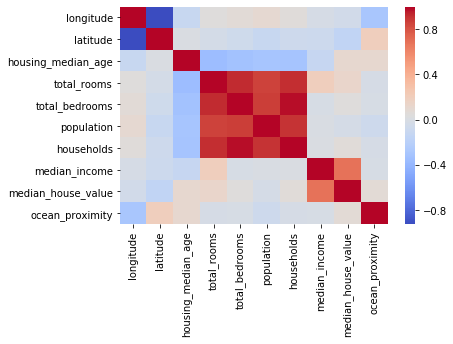

In [15]:
sns.heatmap(cali_num.corr(), cmap='coolwarm');

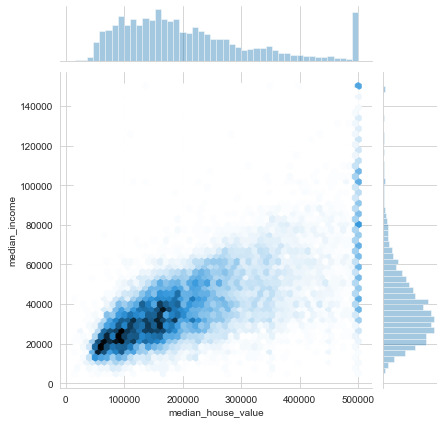

In [16]:
sns.set_style('whitegrid')
sns.jointplot(y='median_income', x='median_house_value', data=cali_num, kind='hex');

In [17]:
#drop latitude and longitude from dataset as there's no strong correlation with the features
#that can impact housing prices 

In [18]:
cali_num.drop(columns=['longitude','latitude'], axis=0, inplace=True)
cali_num.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0,3
1,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0,3
2,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0,3
3,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0,3
4,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0,3


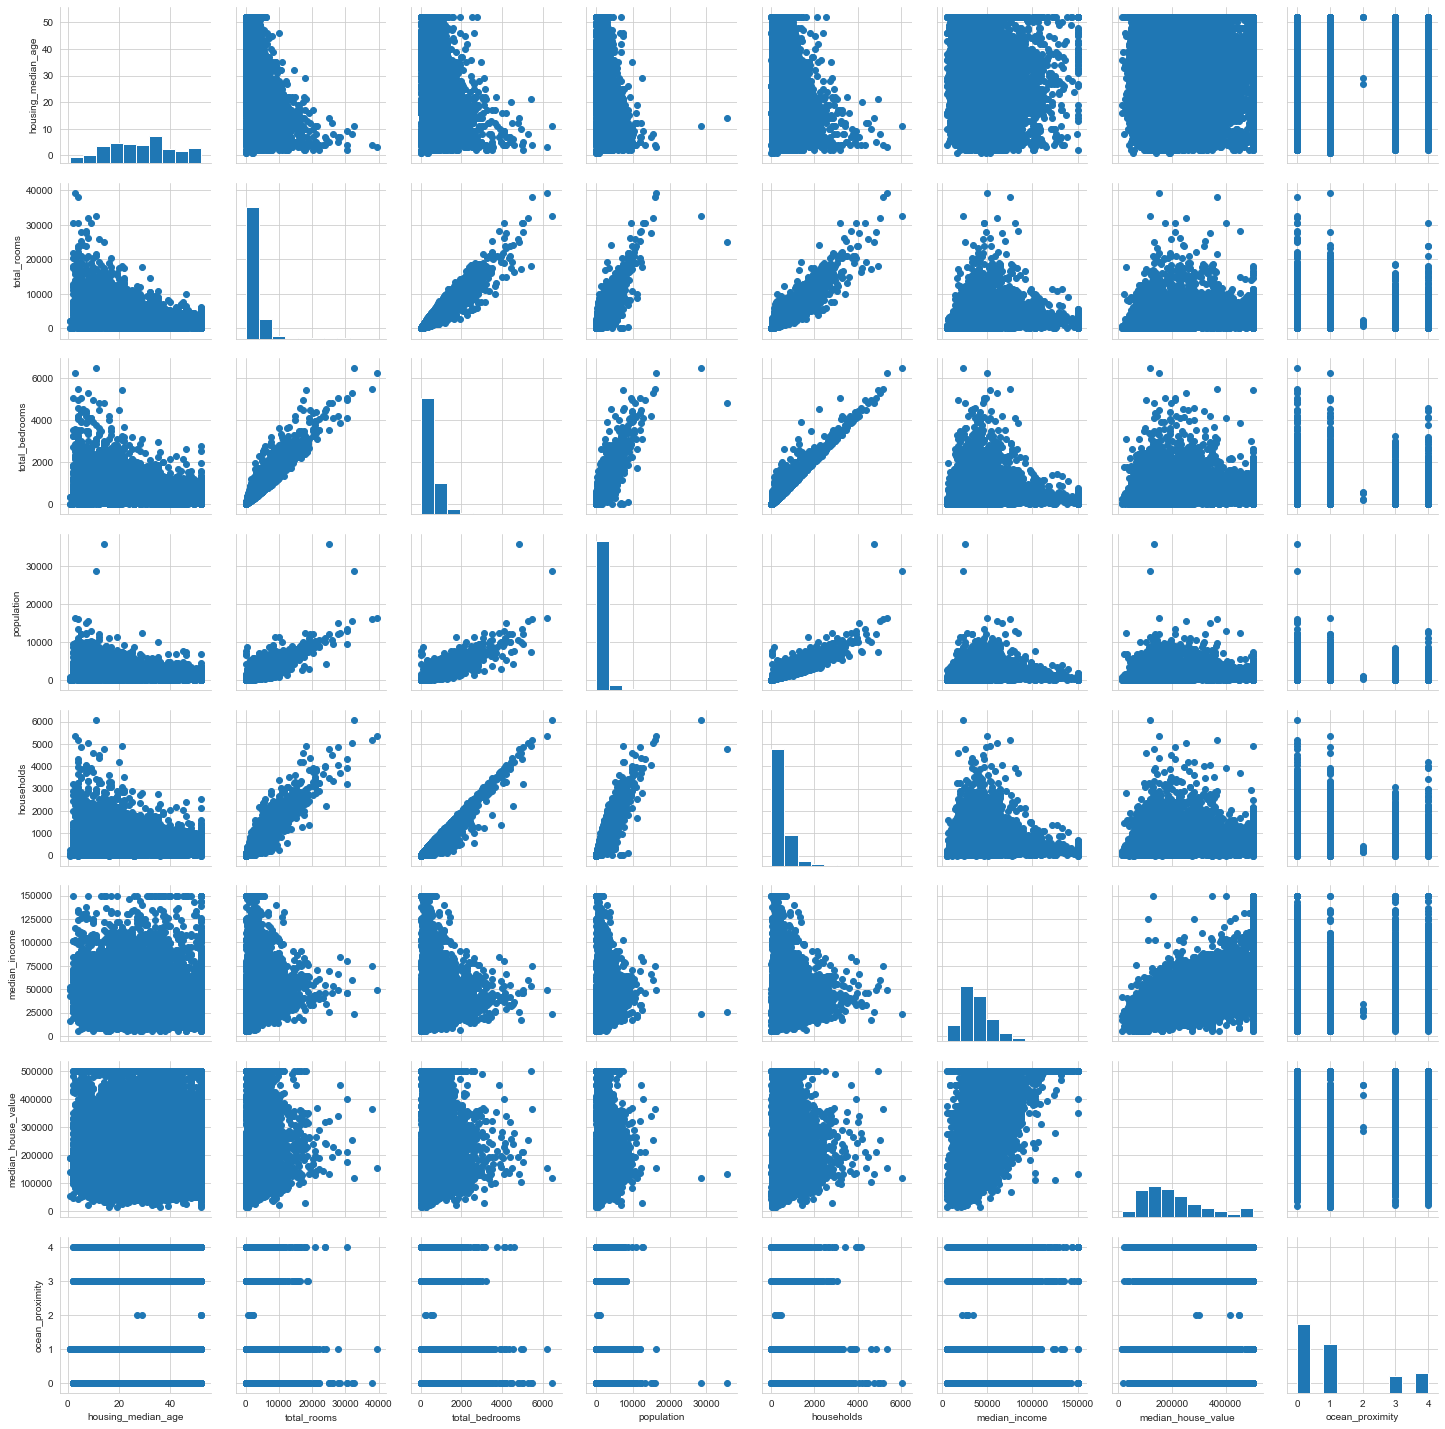

In [19]:
c = sns.PairGrid(data=cali_num)
c.map_diag(plt.hist)
c.map_upper(plt.scatter)
c.map_lower(plt.scatter)

In [20]:
#Looking at the PairGrid above my initial hypothesis of ocean proximity having some correlation
#with median income and median house value doesn't hold true. Ocean proximity doesn't seem to 
# have any real correlation with any of the features. 

#I'll drop the ocean proximity feature from the dataset.

In [21]:
cali_num.drop(columns='ocean_proximity', inplace=True)
cali_num.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,83252.0,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,83014.0,358500.0
2,52.0,1467.0,190.0,496.0,177.0,72574.0,352100.0
3,52.0,1274.0,235.0,558.0,219.0,56431.0,341300.0
4,52.0,1627.0,280.0,565.0,259.0,38462.0,342200.0


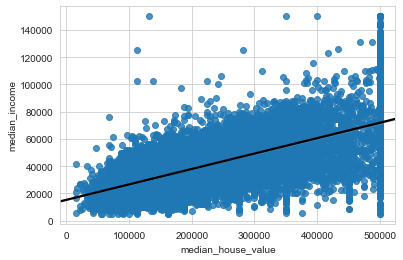

In [22]:
sns.regplot(data=cali_num, x='median_house_value', y='median_income', line_kws={'color':'black'});

In [23]:
#I'm going to train the dataset to try and predict the median house value.

In [24]:
cali_num.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [25]:
X = cali_num[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]
y = cali_num['median_house_value']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
cali_lm = LinearRegression()

In [30]:
cali_lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
cali_lm.coef_

array([1869.93495845,  -20.06989373,  111.71624162,  -32.98996999,
        108.38333558,    4.79366646])

In [ ]:
#Predictions 

In [33]:
predictions = cali_lm.predict(X_test)

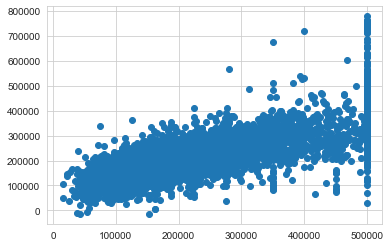

In [34]:
plt.scatter(y_test, predictions)

In [ ]:
#Below the histogram shows that the residuals are normally distributed. This shows that the linear 
#regression model was the right model for the dataset.

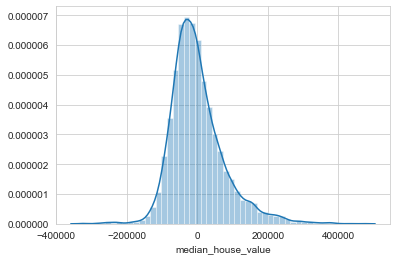

In [35]:
sns.distplot(y_test-predictions)

In [36]:
coeff = cali_lm.coef_
coeff

array([1869.93495845,  -20.06989373,  111.71624162,  -32.98996999,
        108.38333558,    4.79366646])

In [38]:
cali_coeff = pd.DataFrame(coeff, X.columns, columns=['Coefficient'])
cali_coeff

,Coefficient
housing_median_age,1869.934958
total_rooms,-20.069894
total_bedrooms,111.716242
population,-32.989970
households,108.383336
median_income,4.793666
